In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.1     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# read_syntenic_block_file <- read_delim("/home/jpm73279/genome_downloads/C4_markers/C4-genes.syntenic.blocks.tsv")

In [3]:
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = (species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(geneID,name,type,species)

Rows: 30 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [4]:
###### Define a function to read the data and add columns
read_and_annotate_intersect <- function(file_path, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE, col_types = "cccccccccc") %>%
    dplyr::mutate(
      species = species_abbr
    )
}

files_conditions <- list(
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/os.extended_c4_genes.acr_intersection.all.bed", species = "Os"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/pm.extended_c4_genes.acr_intersection.all.bed", species = "Pm"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/sb.extended_c4_genes.acr_intersection.all.bed", species = "Sb"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/uf.extended_c4_genes.acr_intersection.all.bed", species = "Uf"),
list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/all_acr_intersections/zm.extended_c4_genes.acr_intersection.all.bed", species = "Zm")
)

# Read and annotate each file and store results in a list
annotated_data_list <- lapply(files_conditions, function(condition) {
  read_and_annotate_intersect(condition$path, condition$species)
})

# Combine results
combined_acrs_species <- bind_rows(annotated_data_list)

all_acrs_species_types <- combined_acrs_species %>% 
    ungroup() %>% 
    dplyr::left_join(., markers, by = c("species", "X5" = "name")) %>% 
    dplyr::rename(name = X5) %>% 
    dplyr::rename(enzyme_location = type,
          locus = name,
          acr_name_type = X9) %>% 
    tidyr::separate(acr_name_type, into = c("acr", "acr_cell_type_specific_class"), sep = ";") %>%
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class)) %>% 
    tidyr::separate(locus, into = c("species_other", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE)


# graphing_matrix_c4_genes <- all_acrs_species_types %>% 
#     group_by(species, locus, acr_cell_type_specific_class, enzyme_location) %>% 
#     summarise(n_acrs = n())

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 5 rows [317, 318, 319,
320, 321].”


In [5]:
head(all_acrs_species_types)

X1,X2,X3,X4,locus,species_other,loci,gene_family,number,X6,X7,X8,acr,acr_cell_type_specific_class,X10,species,geneID,enzyme_location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4737626,4738127,scACR_1056,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4738483,4738984,scACR_1057,unknown_cells_1,3.57130102496339e-05,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4742983,4743484,scACR_1058,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4744322,4744823,scACR_1059,broadly_accessible,NA,Os,LOC_Os01g09320,mesophyll
Chr1,4737606,4747120,LOC_Os01g09320,Os__NADPME_1,Os,NADPME_1,NADPME,1,Chr1,4745818,4746319,scACR_1060,"epidermis,protoderm,unknown_cells_1","0,7.14260204992679e-05,3.57130102496339e-05",Os,LOC_Os01g09320,mesophyll
Chr1,5898224,5911502,LOC_Os01g11054,Os__PEPC_1,Os,PEPC_1,PEPC,1,Chr1,5899326,5899827,scACR_1352,mesophyll,0,Os,LOC_Os01g11054,mesophyll


In [6]:
library(tidyverse)
library(stringr)

process_file <- function(file_info) {
  file_path <- file_info$path
  species <- file_info$species

  # Read and process the file
  read_delim(file_path, 
             col_names = c("qChr", "qStart", "qEnd", "acr_name", "pval", "refFile", "rChr", "rStart", "rEnd", "rName", "rWidth", "strand"),
             col_types = "cccccccccccc") %>%
    dplyr::mutate(species = species) %>%
    tidyr::separate(acr_name, into = c("acr", "acr_cell_type_specific_class", "locus"), sep = ";") %>%
    dplyr::mutate(
      refFile = str_replace(refFile, "\\.all_combined_regions\\.passing_regions\\.blast_passing_regions\\.intersecting_regions\\.ref\\.frac\\.bed", ""),
      refFile = str_replace(refFile, ".*\\.vs\\.", "")
    )
}

# Define file information as a list of lists
file_infos <- list(
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Os.all.ACR_conservation.intersection.bed", species = "Os"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Pm.all.ACR_conservation.intersection.bed", species = "Pm"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Sb.all.ACR_conservation.intersection.bed", species = "Sb"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Uf.all.ACR_conservation.intersection.bed", species = "Uf"),
list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Zm.all.ACR_conservation.intersection.bed", species = "Zm")
)

# Process each file
acr_scored_conservation <- bind_rows(lapply(file_infos, process_file)) %>% 
  dplyr::filter(rName != ".") %>% 
  tidyr::separate(rName, into = c("RefFrom", "racr_name", "rcell_type", "gene_family", "gene_family2"), sep = ";", ) %>% 
    dplyr::select(acr, acr_cell_type_specific_class, locus, racr_name, rcell_type , gene_family, rWidth, species) %>%
    separate(racr_name, into = c("rspecies", "racr"), sep = "_(.*)", extra = "merge", remove = FALSE) %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class)) %>% 
    dplyr::mutate(qacr = str_c(species, acr, sep = "_"))




In [7]:
head(acr_scored_conservation)

acr,acr_cell_type_specific_class,locus,racr_name,rspecies,racr,rcell_type,gene_family,rWidth,species,qacr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
scACR_1059,broadly_accessible,Os__NADPME_1,Sb_scACR_45081,Sb,,broadly_accessible,NADPME,51,Os,Os_scACR_1059
scACR_1059,broadly_accessible,Os__NADPME_1,Sb_scACR_45081,Sb,,broadly_accessible,NADPME,68,Os,Os_scACR_1059
scACR_1059,broadly_accessible,Os__NADPME_1,Uf_scACR_17713,Uf,,broadly_accessible,NADPME,49,Os,Os_scACR_1059
scACR_1059,broadly_accessible,Os__NADPME_1,Zm_scACR_40643,Zm,,broadly_accessible,NADPME,44,Os,Os_scACR_1059
scACR_1059,broadly_accessible,Os__NADPME_1,Zm_scACR_40644,Zm,,broadly_accessible,NADPME,40,Os,Os_scACR_1059
scACR_4586,mesophyll,Os__CA_1,Uf_scACR_15989,Uf,,mesophyll,CA,28,Os,Os_scACR_4586


In [8]:
library("ggalluvial")

In [9]:
data(majors)
majors$curriculum <- as.factor(majors$curriculum)

In [10]:
acr_alluvial_test <- acr_scored_conservation %>% 
    #dplyr::filter(gene_family == "PEPCK") %>% 
    dplyr::select(-acr) %>% 
    dplyr::filter(species == "Uf") %>% 
    dplyr::filter(gene_family == "CA") %>% 
    dplyr::select(qacr, acr_cell_type_specific_class, rcell_type, racr_name, 
                  rspecies, species, gene_family) %>% 
    distinct() %>% 
    dplyr::select(-racr_name)


first_pair <- acr_alluvial_test %>% 
  select(qacr, acr_cell_type_specific_class, species, gene_family) %>% 
  rename(Cell_Type = acr_cell_type_specific_class, Species = species) %>% 
  distinct() %>% 
  dplyr::mutate(freq = 1)

# Pivot for the second pair: 'rcell_type' and 'rspecies'
second_pair <- acr_alluvial_test %>% 
  select(qacr, rcell_type, rspecies, gene_family) %>% 
  rename(Cell_Type = rcell_type, Species = rspecies) %>% 
  distinct() %>% 
  dplyr::group_by(qacr, Cell_Type, Species, gene_family) %>% 
  summarise(freq = n()) %>% 
  dplyr::ungroup()


# Combine the two pairs
combined_df_alluvial <- bind_rows(first_pair, second_pair) %>% 
    distinct() %>% 
    dplyr::group_by(qacr, Cell_Type, Species, gene_family) %>% 
    summarise(freq = sum(freq)) 


combined_df_alluvial$Cell_Type <- as.factor(combined_df_alluvial$Cell_Type)
combined_df_alluvial$Species <- as.factor(combined_df_alluvial$Species)


combined_df_alluvial$Species <- factor(combined_df_alluvial$Species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))
# Optionally, to check the levels of the factor
levels(combined_df_alluvial$Species)


`summarise()` has grouped output by 'qacr', 'Cell_Type', 'Species'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'qacr', 'Cell_Type', 'Species'. You can
override using the `.groups` argument.


[1] "Zm" "Sb" "Pm" "Uf" "Os"

In [11]:
(combined_df_alluvial)

qacr,Cell_Type,Species,gene_family,freq
<chr>,<fct>,<fct>,<chr>,<dbl>
Uf_scACR_15983,broadly_accessible,Pm,CA,1
Uf_scACR_15983,broadly_accessible,Sb,CA,1
Uf_scACR_15983,epidermis,Uf,CA,1
Uf_scACR_15983,epidermis,Zm,CA,1
Uf_scACR_15984,broadly_accessible,Pm,CA,1
Uf_scACR_15984,broadly_accessible,Sb,CA,1
Uf_scACR_15984,broadly_accessible,Zm,CA,1
Uf_scACR_15984,epidermis,Pm,CA,1
Uf_scACR_15984,mesophyll,Os,CA,1


In [12]:
all_combinations <- expand.grid(
  qacr = unique(combined_df_alluvial$qacr),
  Species = unique(combined_df_alluvial$Species)
)

# Step 2: Merge this with the original data
df_expanded <- all_combinations %>%
  left_join(combined_df_alluvial, by = c("qacr", "Species"))


In [13]:
df_expanded <- df_expanded %>%
  group_by(qacr, Species, gene_family) %>%
  mutate(observation_id = row_number()) %>%
  summarise(Cell_Type = paste(unique(Cell_Type), collapse = ", "),
            freq = sum(freq, na.rm = TRUE)) %>%
  ungroup() %>% 
  dplyr::mutate(Cell_Type = case_when(is.na(Cell_Type) == TRUE ~ "Not Found", 
                   TRUE ~ Cell_Type)) %>% 
    dplyr::mutate(freq = case_when(freq == 0 ~ 1, 
                                  TRUE ~ freq))

df_expanded

`summarise()` has grouped output by 'qacr', 'Species'. You can override using
the `.groups` argument.


qacr,Species,gene_family,Cell_Type,freq
<chr>,<fct>,<chr>,<chr>,<dbl>
Uf_scACR_15983,Zm,CA,epidermis,1
Uf_scACR_15983,Sb,CA,broadly_accessible,1
Uf_scACR_15983,Pm,CA,broadly_accessible,1
Uf_scACR_15983,Uf,CA,epidermis,1
Uf_scACR_15983,Os,NA,NA,1
Uf_scACR_15984,Zm,CA,"broadly_accessible, mesophyll",2
Uf_scACR_15984,Sb,CA,"broadly_accessible, mesophyll",2
Uf_scACR_15984,Pm,CA,"broadly_accessible, epidermis, protoderm",3
Uf_scACR_15984,Uf,CA,mesophyll,1


In [14]:
is_lodes_form(df_expanded, 
        key = "Species",
        value = "Cell_Type",
        id = "qacr")

[1] TRUE

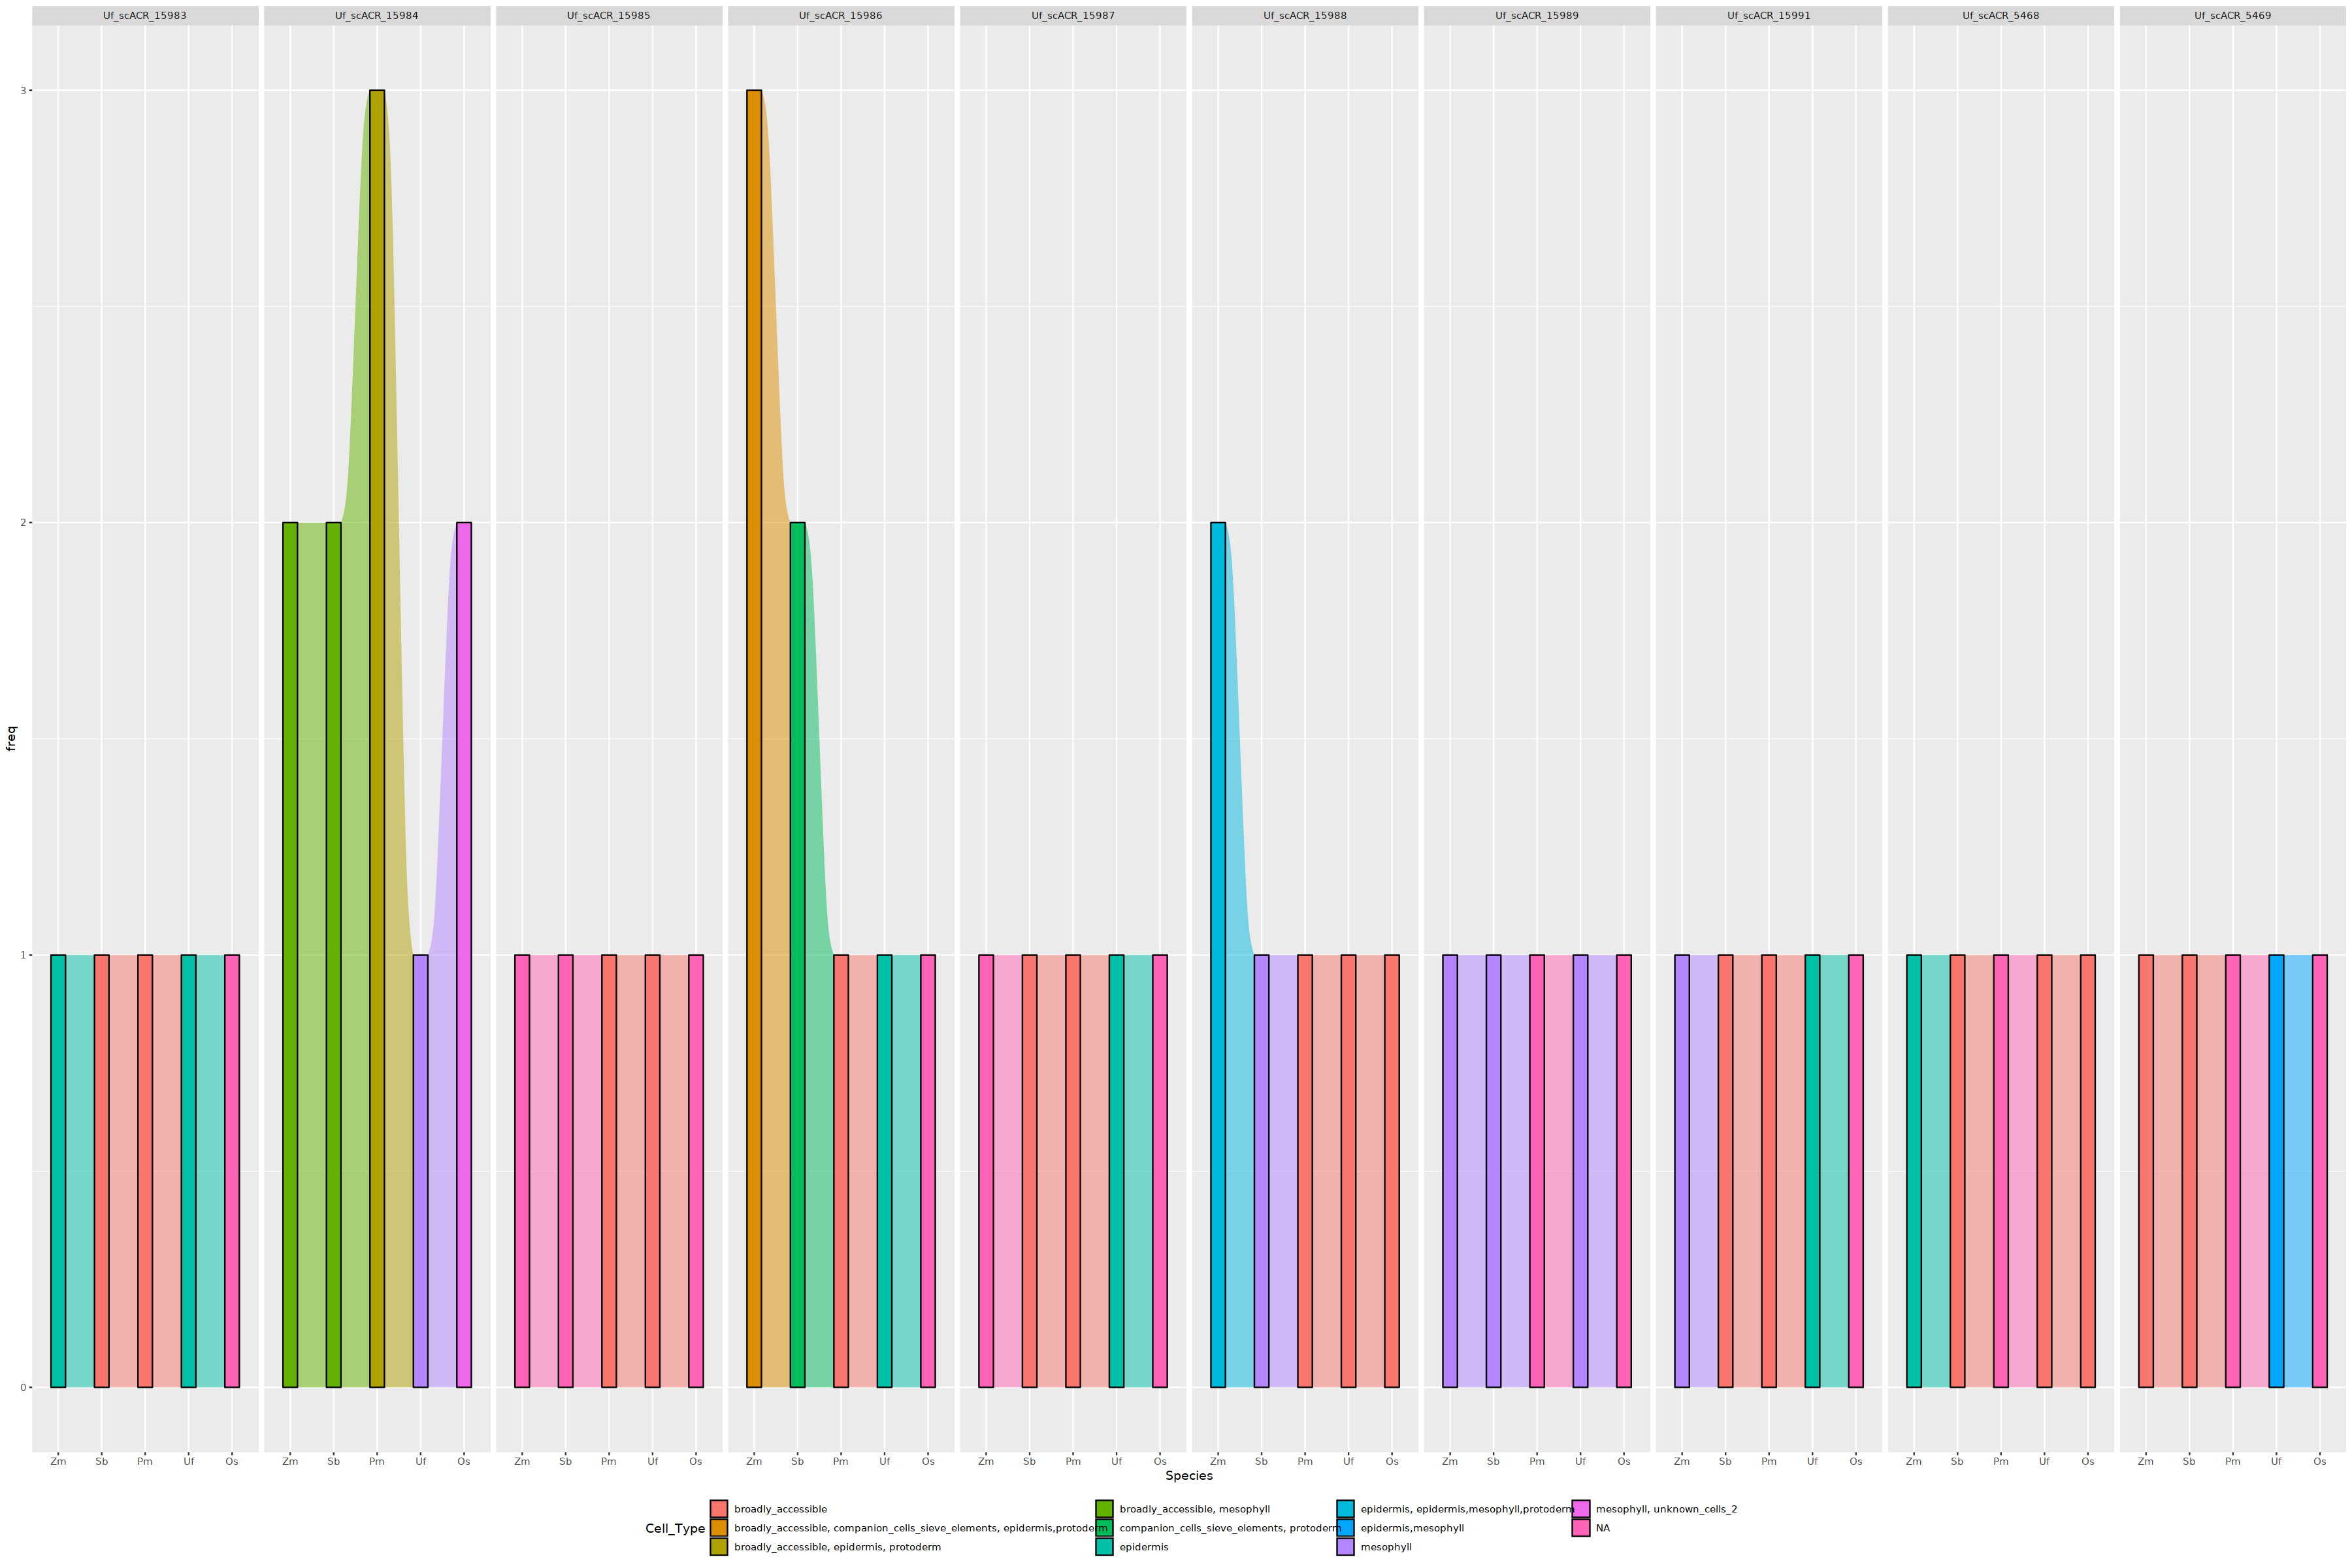

In [15]:

options(repr.plot.width=30, repr.plot.height=20)
ggplot(df_expanded,
       aes(x = Species, 
           stratum = Cell_Type, 
           alluvium = qacr,
           y = freq,
           fill = Cell_Type, 
           label = Cell_Type)) +
  geom_flow() +
  geom_stratum(na.rm = FALSE) +
  theme(legend.position = "bottom") +
  facet_grid(.~qacr)

In [16]:
library(patchwork)

In [17]:
# Set options
options(repr.plot.width=30, repr.plot.height=20)

# Create a list to store the plots
plot_list <- list()

# Loop over each combination of qacr and gene_family
for(qacr in unique(df_expanded$qacr)){
  for(gene_family in unique(df_expanded$gene_family)){
    # Filter the data for the current combination
    df_filtered <- df_expanded %>% filter(qacr == qacr, gene_family == gene_family)
    
    # Create the plot for the current combination
    p <- ggplot(df_filtered, aes(x = Species, 
                                 stratum = Cell_Type, 
                                 alluvium = qacr, 
                                 y = freq,
                                 fill = Cell_Type, 
                                 label = Cell_Type)) +
      geom_flow() +
      geom_stratum(na.rm = FALSE) +
      theme(legend.position = "bottom")
    
    # Add the plot to the list
    plot_list[[paste(qacr, gene_family, sep = "_")]] <- p
  }
}

# Combine all the plots
combined_plot <- wrap_plots(plot_list, ncol = length(unique(df_expanded$gene_family)))

In [19]:
options(repr.plot.width=80, repr.plot.height=80)

combined_plot